#### Building a Decision Tree for a company to decise on its sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\DataScience\Assignment\Decision Tree\Company_Data.csv", encoding='latin')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes



# Data Insights

In [3]:

df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


# Label Encoder 

In [6]:
le = LabelEncoder()

df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['US'] = le.fit_transform(df['US'])
df['Urban'] = le.fit_transform(df['Urban'])

df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1



## Converting the target column into categorical variable 

In [7]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
Sales_cat = []
for value in df['Sales']:
    if value < 7.49:
        Sales_cat.append('low')
    else:
        Sales_cat.append('high')

df['Sales_cat'] = Sales_cat

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


## Splitting the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df.iloc[:, 1:-1]
y = df['Sales_cat']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=40)

## Decision Tree Classifier using Entropy Criteria

### Model 1 (max depth = 4)

In [12]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt.fit(xtrain, ytrain)
print('Train accuracy is' , dt.score(xtrain, ytrain))
print('Test accuracy is' , dt.score(xtest, ytest))

Train accuracy is 0.809375
Test accuracy is 0.65


### Model 2 (max depth = 3)

In [13]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt2.fit(xtrain, ytrain)
print('Train accuracy is' , dt2.score(xtrain, ytrain))
print('Test accuracy is' , dt2.score(xtest, ytest))

Train accuracy is 0.740625
Test accuracy is 0.725


### Model 3 (max depth = 5)

In [14]:
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt3.fit(xtrain, ytrain)
print('Train accuracy is' , dt3.score(xtrain, ytrain))
print('Test accuracy is' , dt3.score(xtest, ytest))

Train accuracy is 0.86875
Test accuracy is 0.6375


Here, model 2 has similar Testing and Training accuracy. Hence, we select model no 2.

## Tree

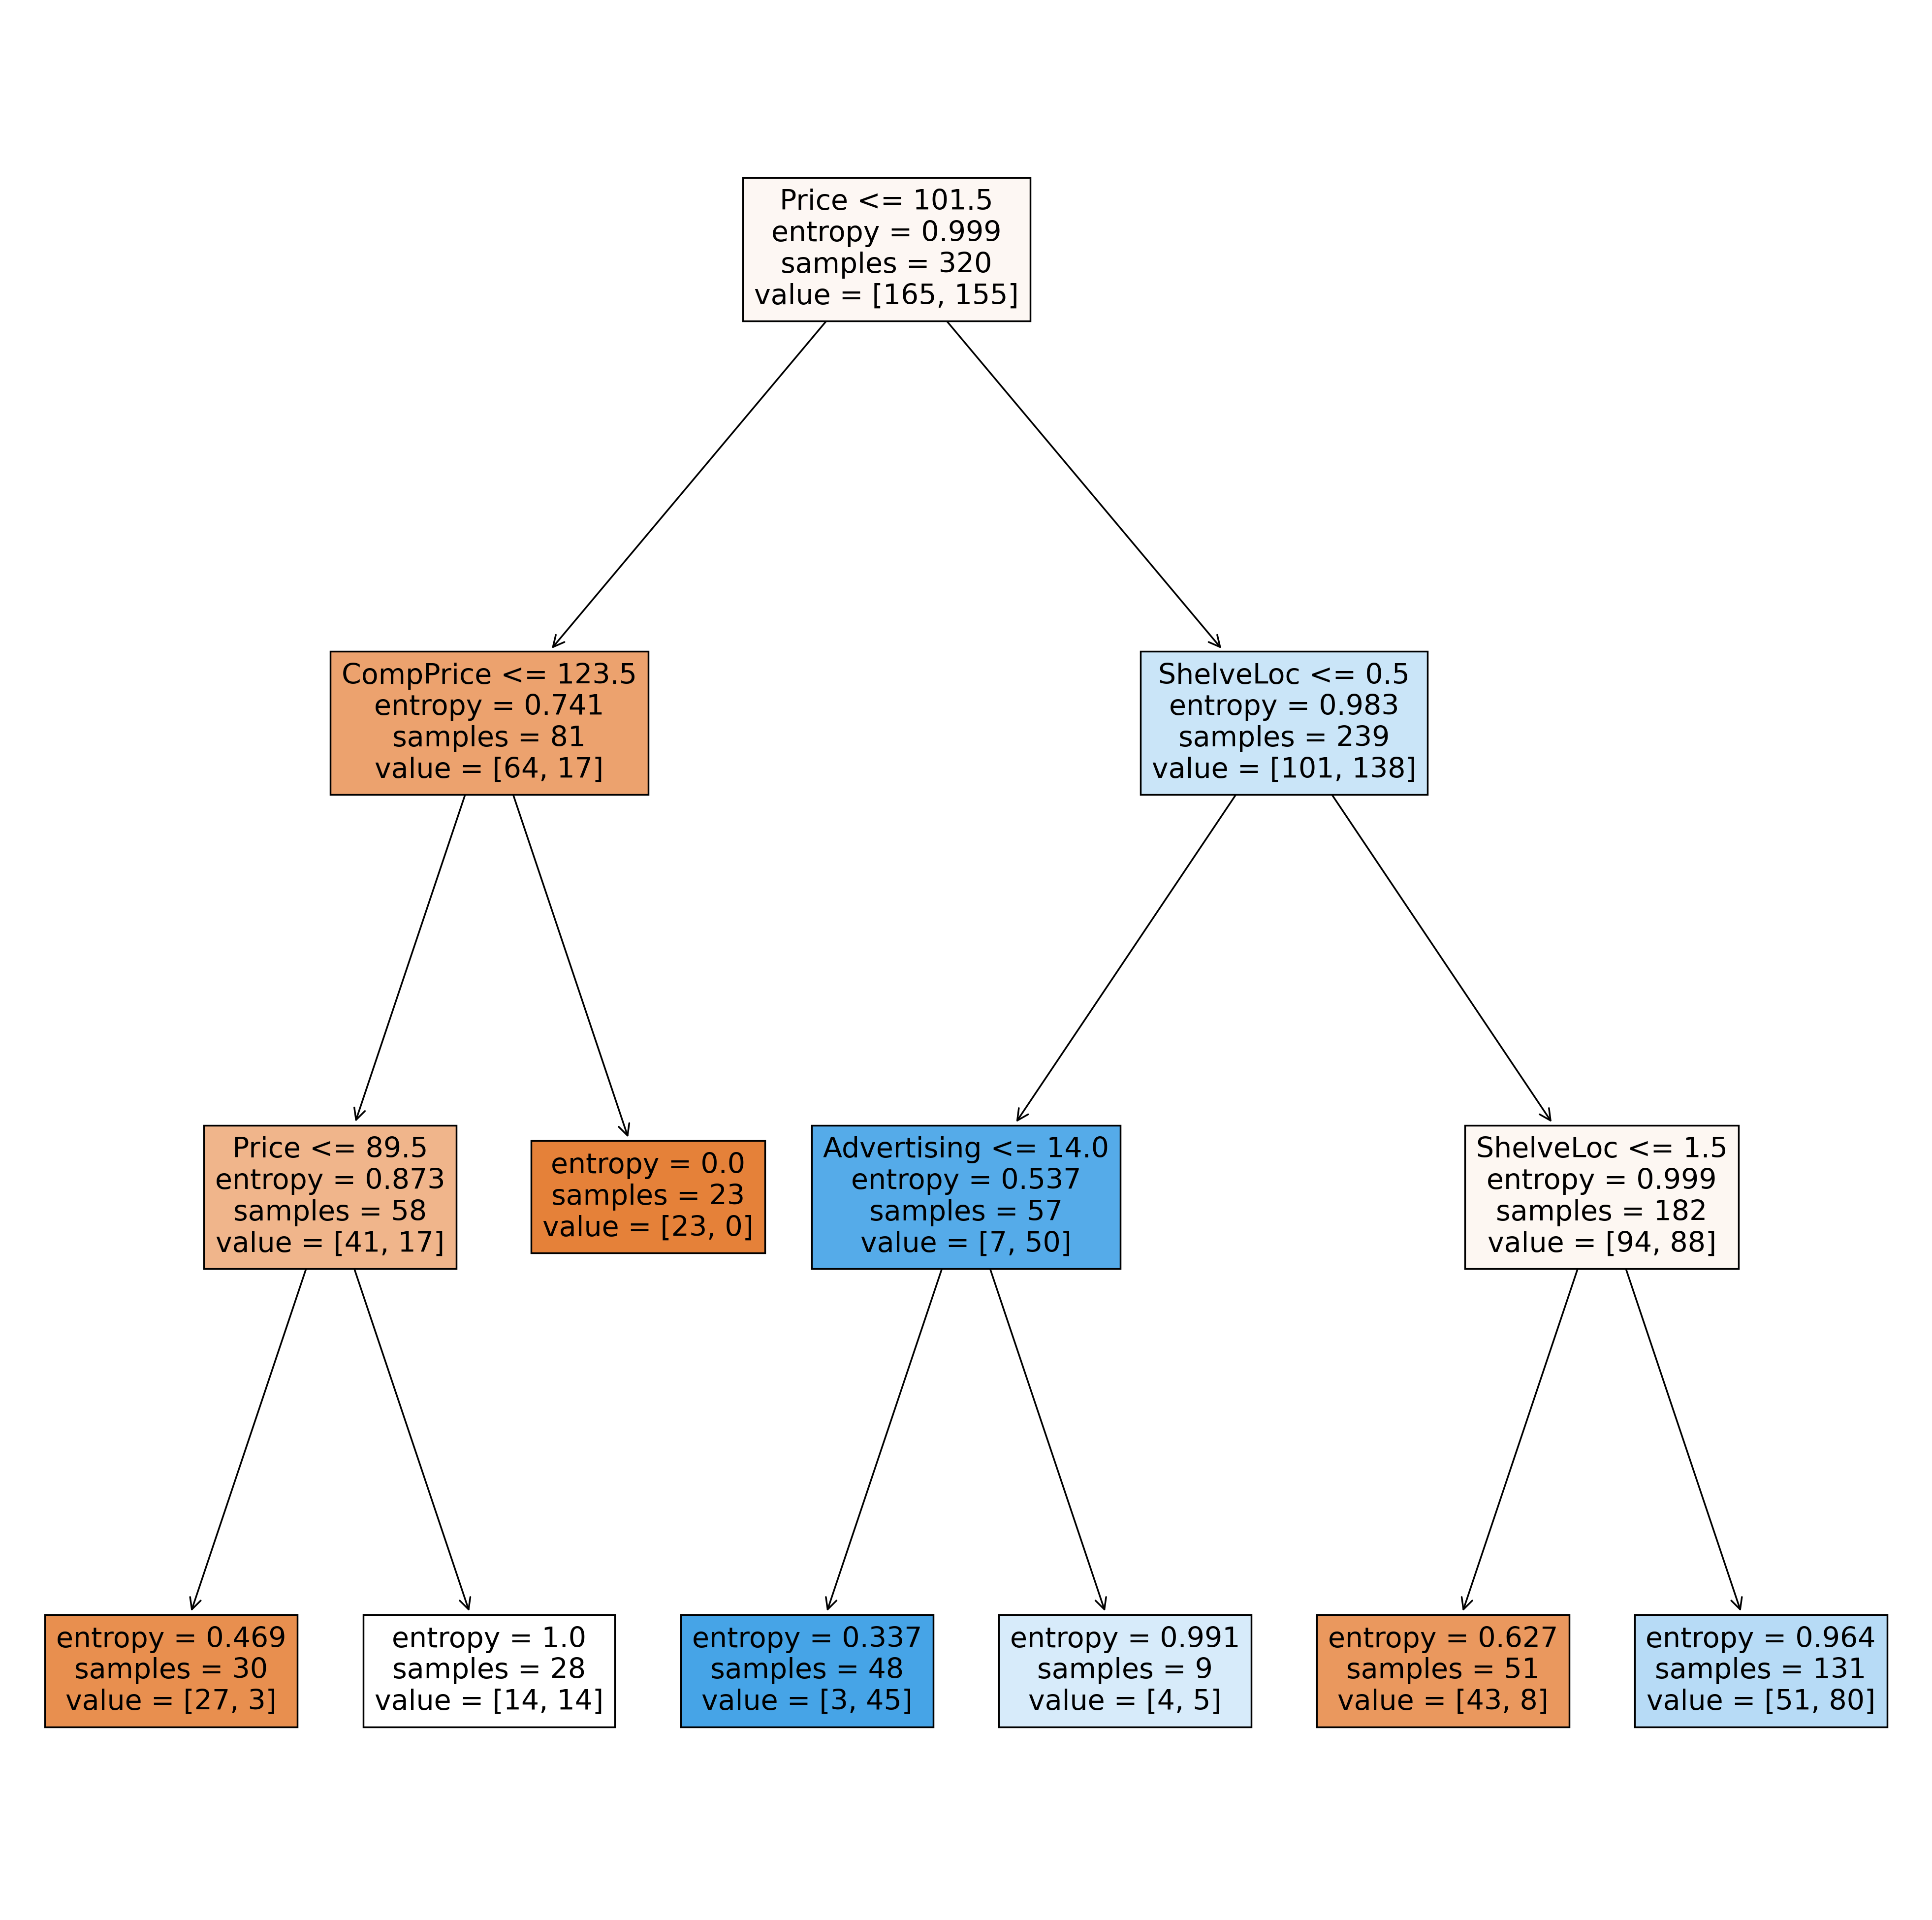

In [15]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt2, feature_names=x.columns, filled=True)
plt.show()

## Prediction of New Data

In [16]:
ypred = dt2.predict(xtest)
ypred

array(['high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low',
       'low'], dtype=object)

In [17]:
pd.DataFrame({"Actual":ytest, "Predicted":ypred})

,Actual,Predicted
132,high,high
390,low,low
310,high,low
3,low,high
248,low,high
...,...,...
361,high,low
197,low,low
23,low,low
54,low,low


## Feature Importance

In [18]:
dt2.feature_importances_

array([0.09994227, 0.        , 0.0585452 , 0.        , 0.35449158,
       0.48702095, 0.        , 0.        , 0.        , 0.        ])

In [19]:
imp = pd.Series(dt2.feature_importances_, index=x.columns)
imp

CompPrice      0.099942
Income         0.000000
Advertising    0.058545
Population     0.000000
Price          0.354492
ShelveLoc      0.487021
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

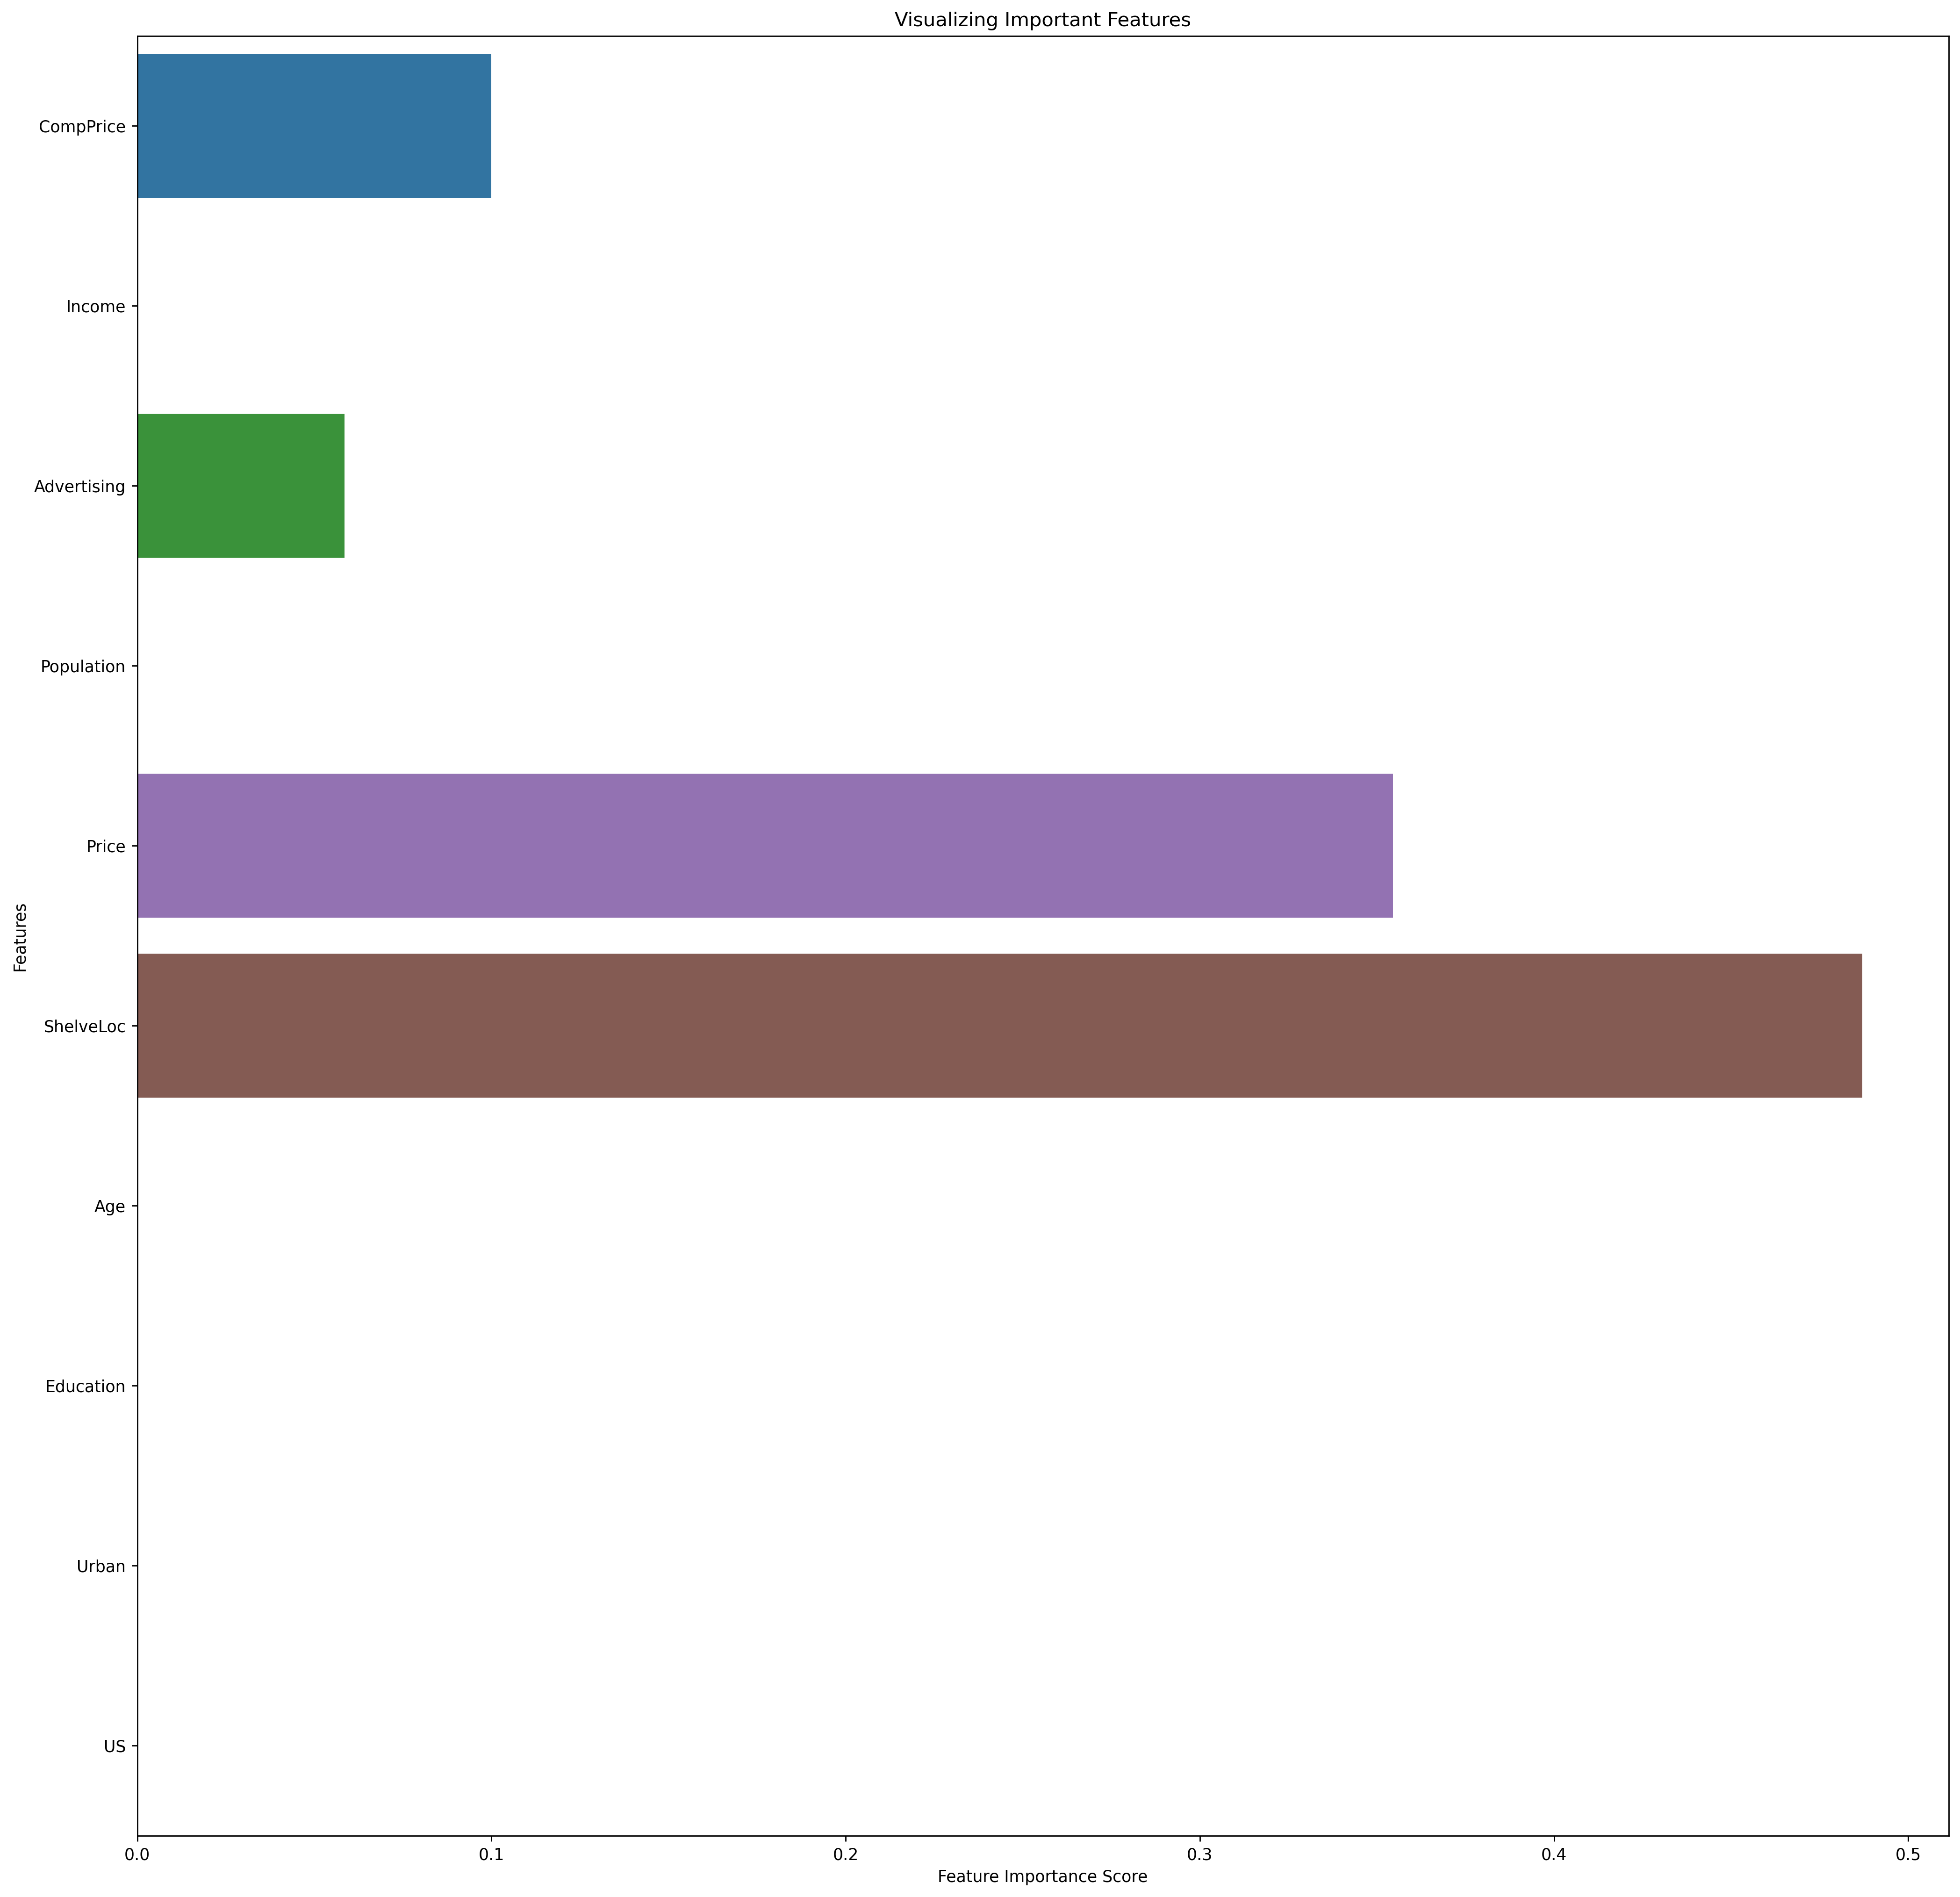

In [20]:
sns.barplot(x = imp, y = imp.index)
plt.rcParams['figure.figsize'] = [5,7]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Decision Tree Classifier (CART) using Gini Criteria

In [21]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(xtrain, ytrain)
print('Train accuracy is' , dt.score(xtrain, ytrain))
print('Test accuracy is' , dt.score(xtest, ytest))

Train accuracy is 0.76875
Test accuracy is 0.7


## Tree

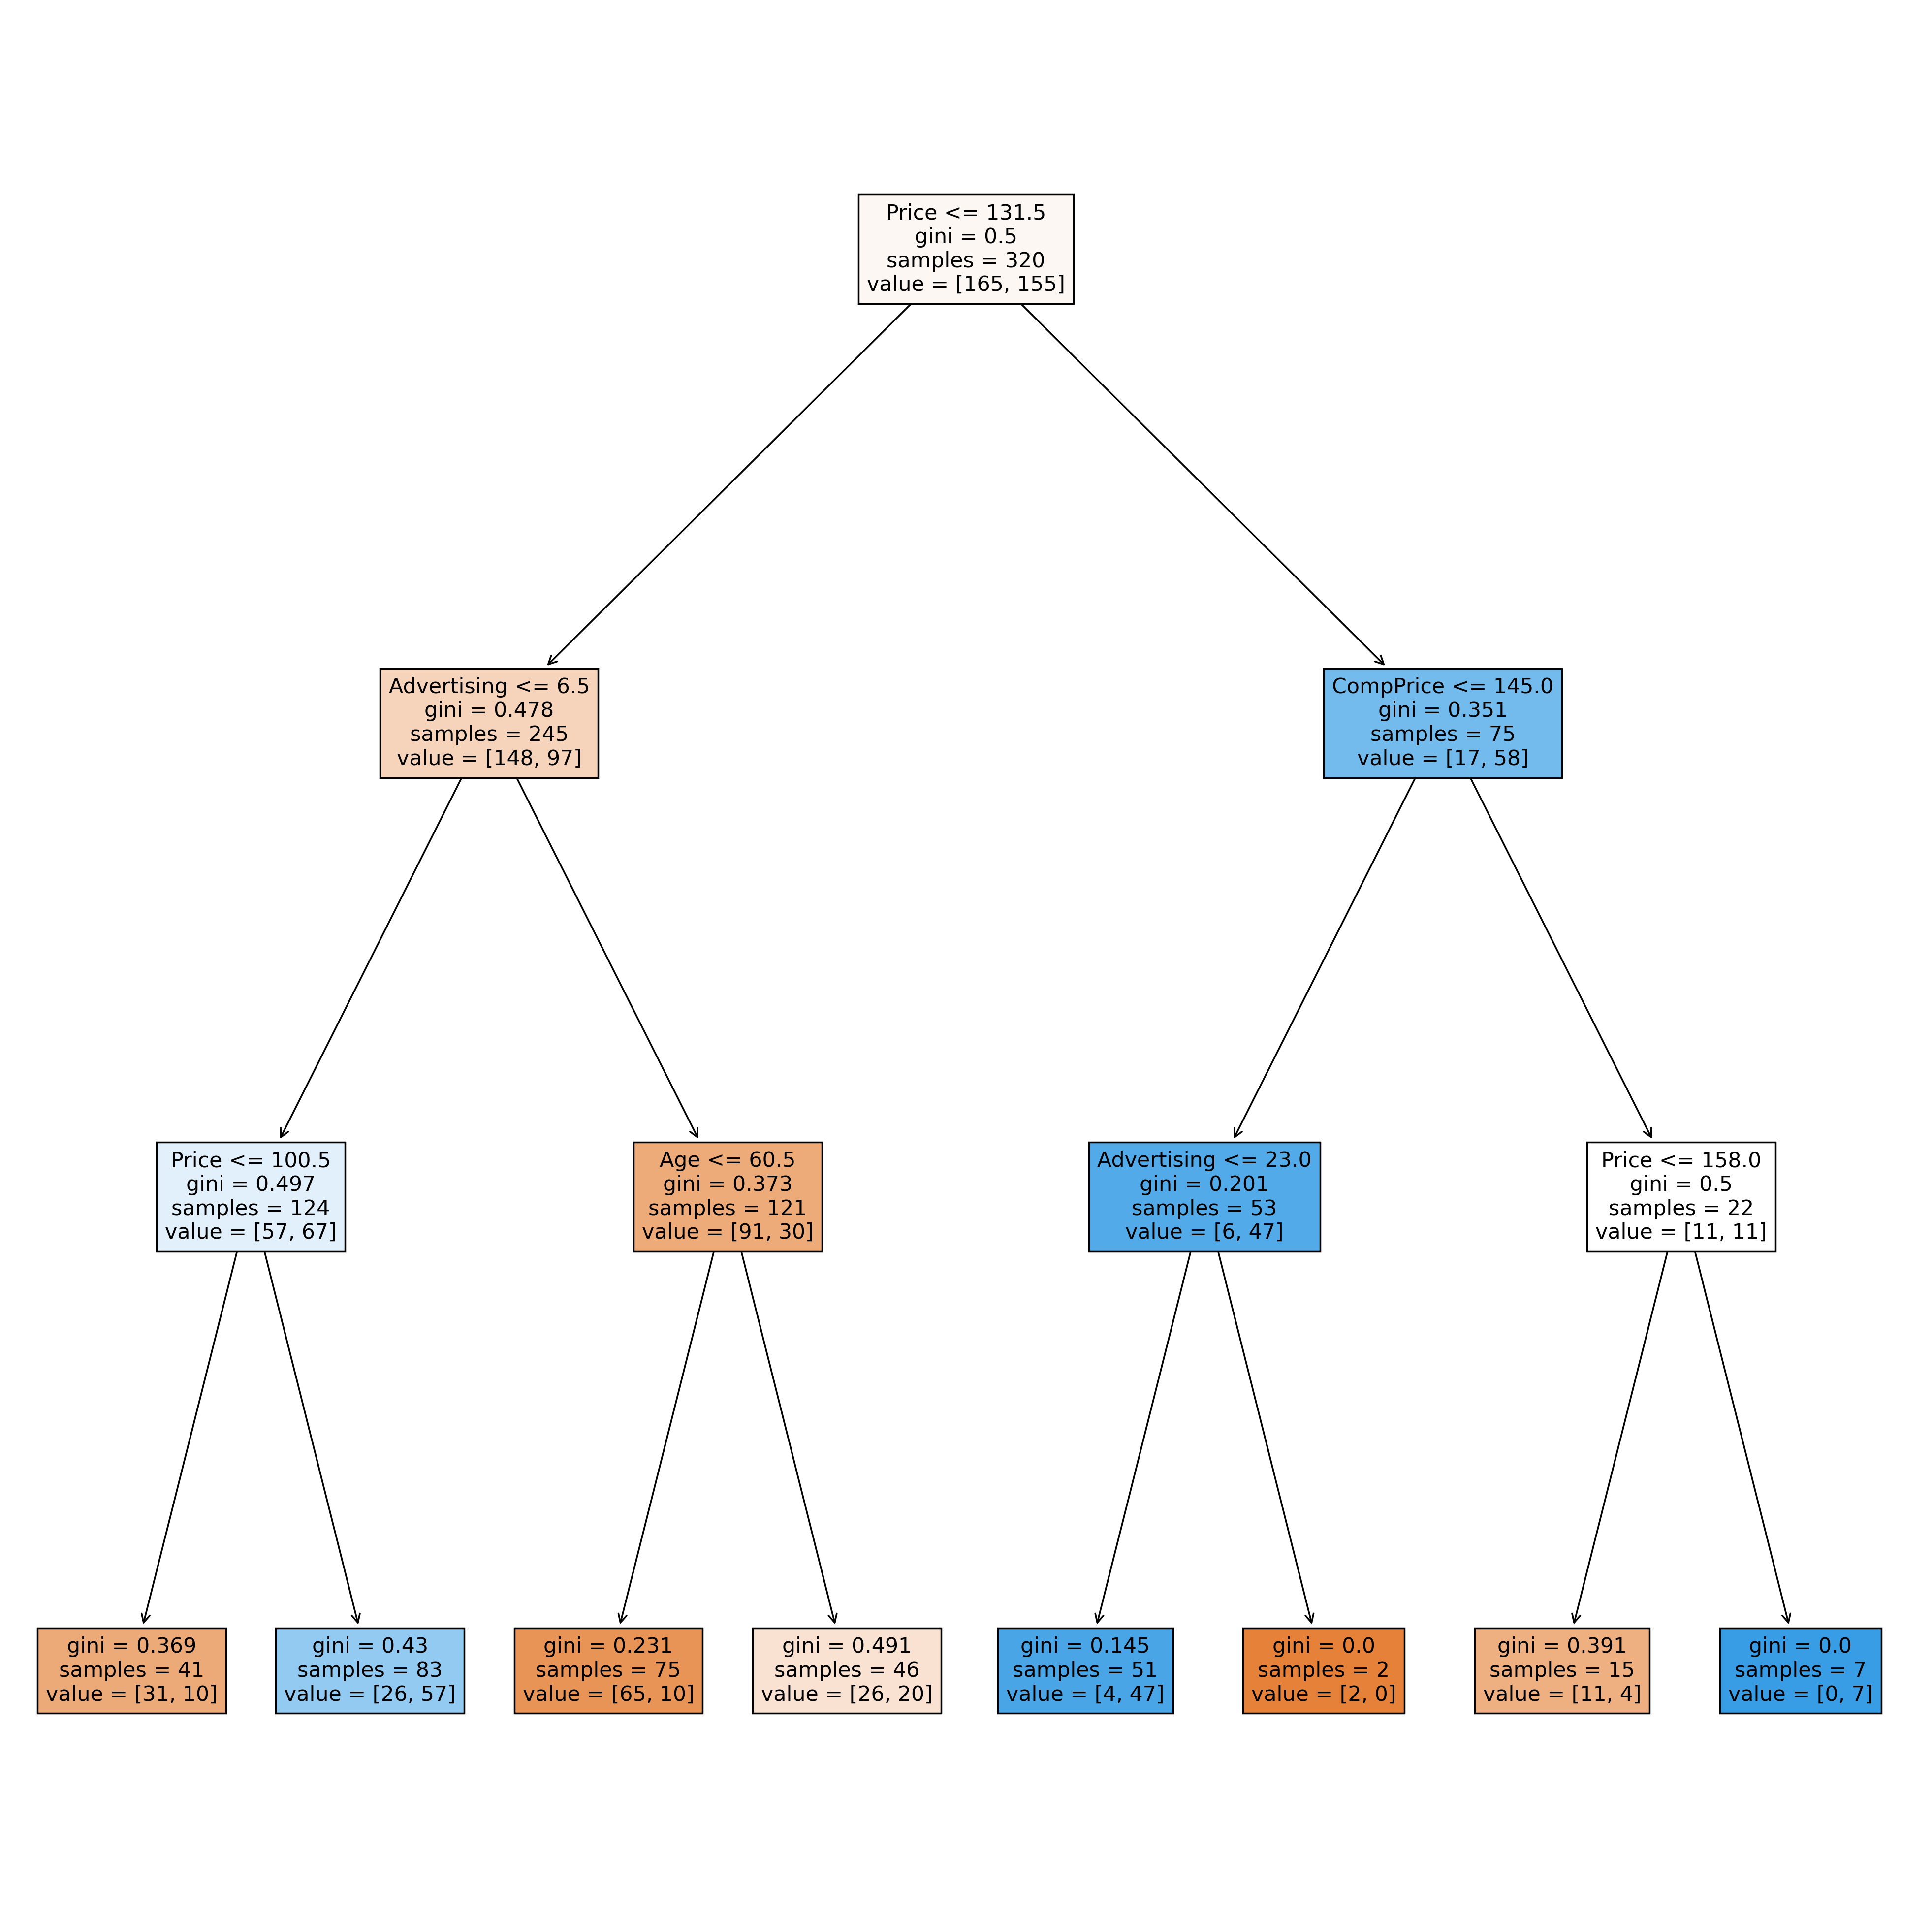

In [22]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['figure.dpi'] = 250

tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()

## Prediction of New Data

In [23]:
ypred2 = dt.predict(xtest)
ypred2

array(['low', 'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'low', 'high'], dtype=object)

In [24]:
pd.DataFrame({"Actual":ytest, "Predicted":ypred2})

,Actual,Predicted
132,high,low
390,low,high
310,high,low
3,low,high
248,low,low
...,...,...
361,high,high
197,low,low
23,low,low
54,low,low


### Feature Importance

In [25]:
dt.feature_importances_

array([0.08332166, 0.        , 0.24610652, 0.        , 0.57775497,
       0.        , 0.09281685, 0.        , 0.        , 0.        ])

In [26]:
imp2 = pd.Series(dt.feature_importances_, index=x.columns)
imp2

CompPrice      0.083322
Income         0.000000
Advertising    0.246107
Population     0.000000
Price          0.577755
ShelveLoc      0.000000
Age            0.092817
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

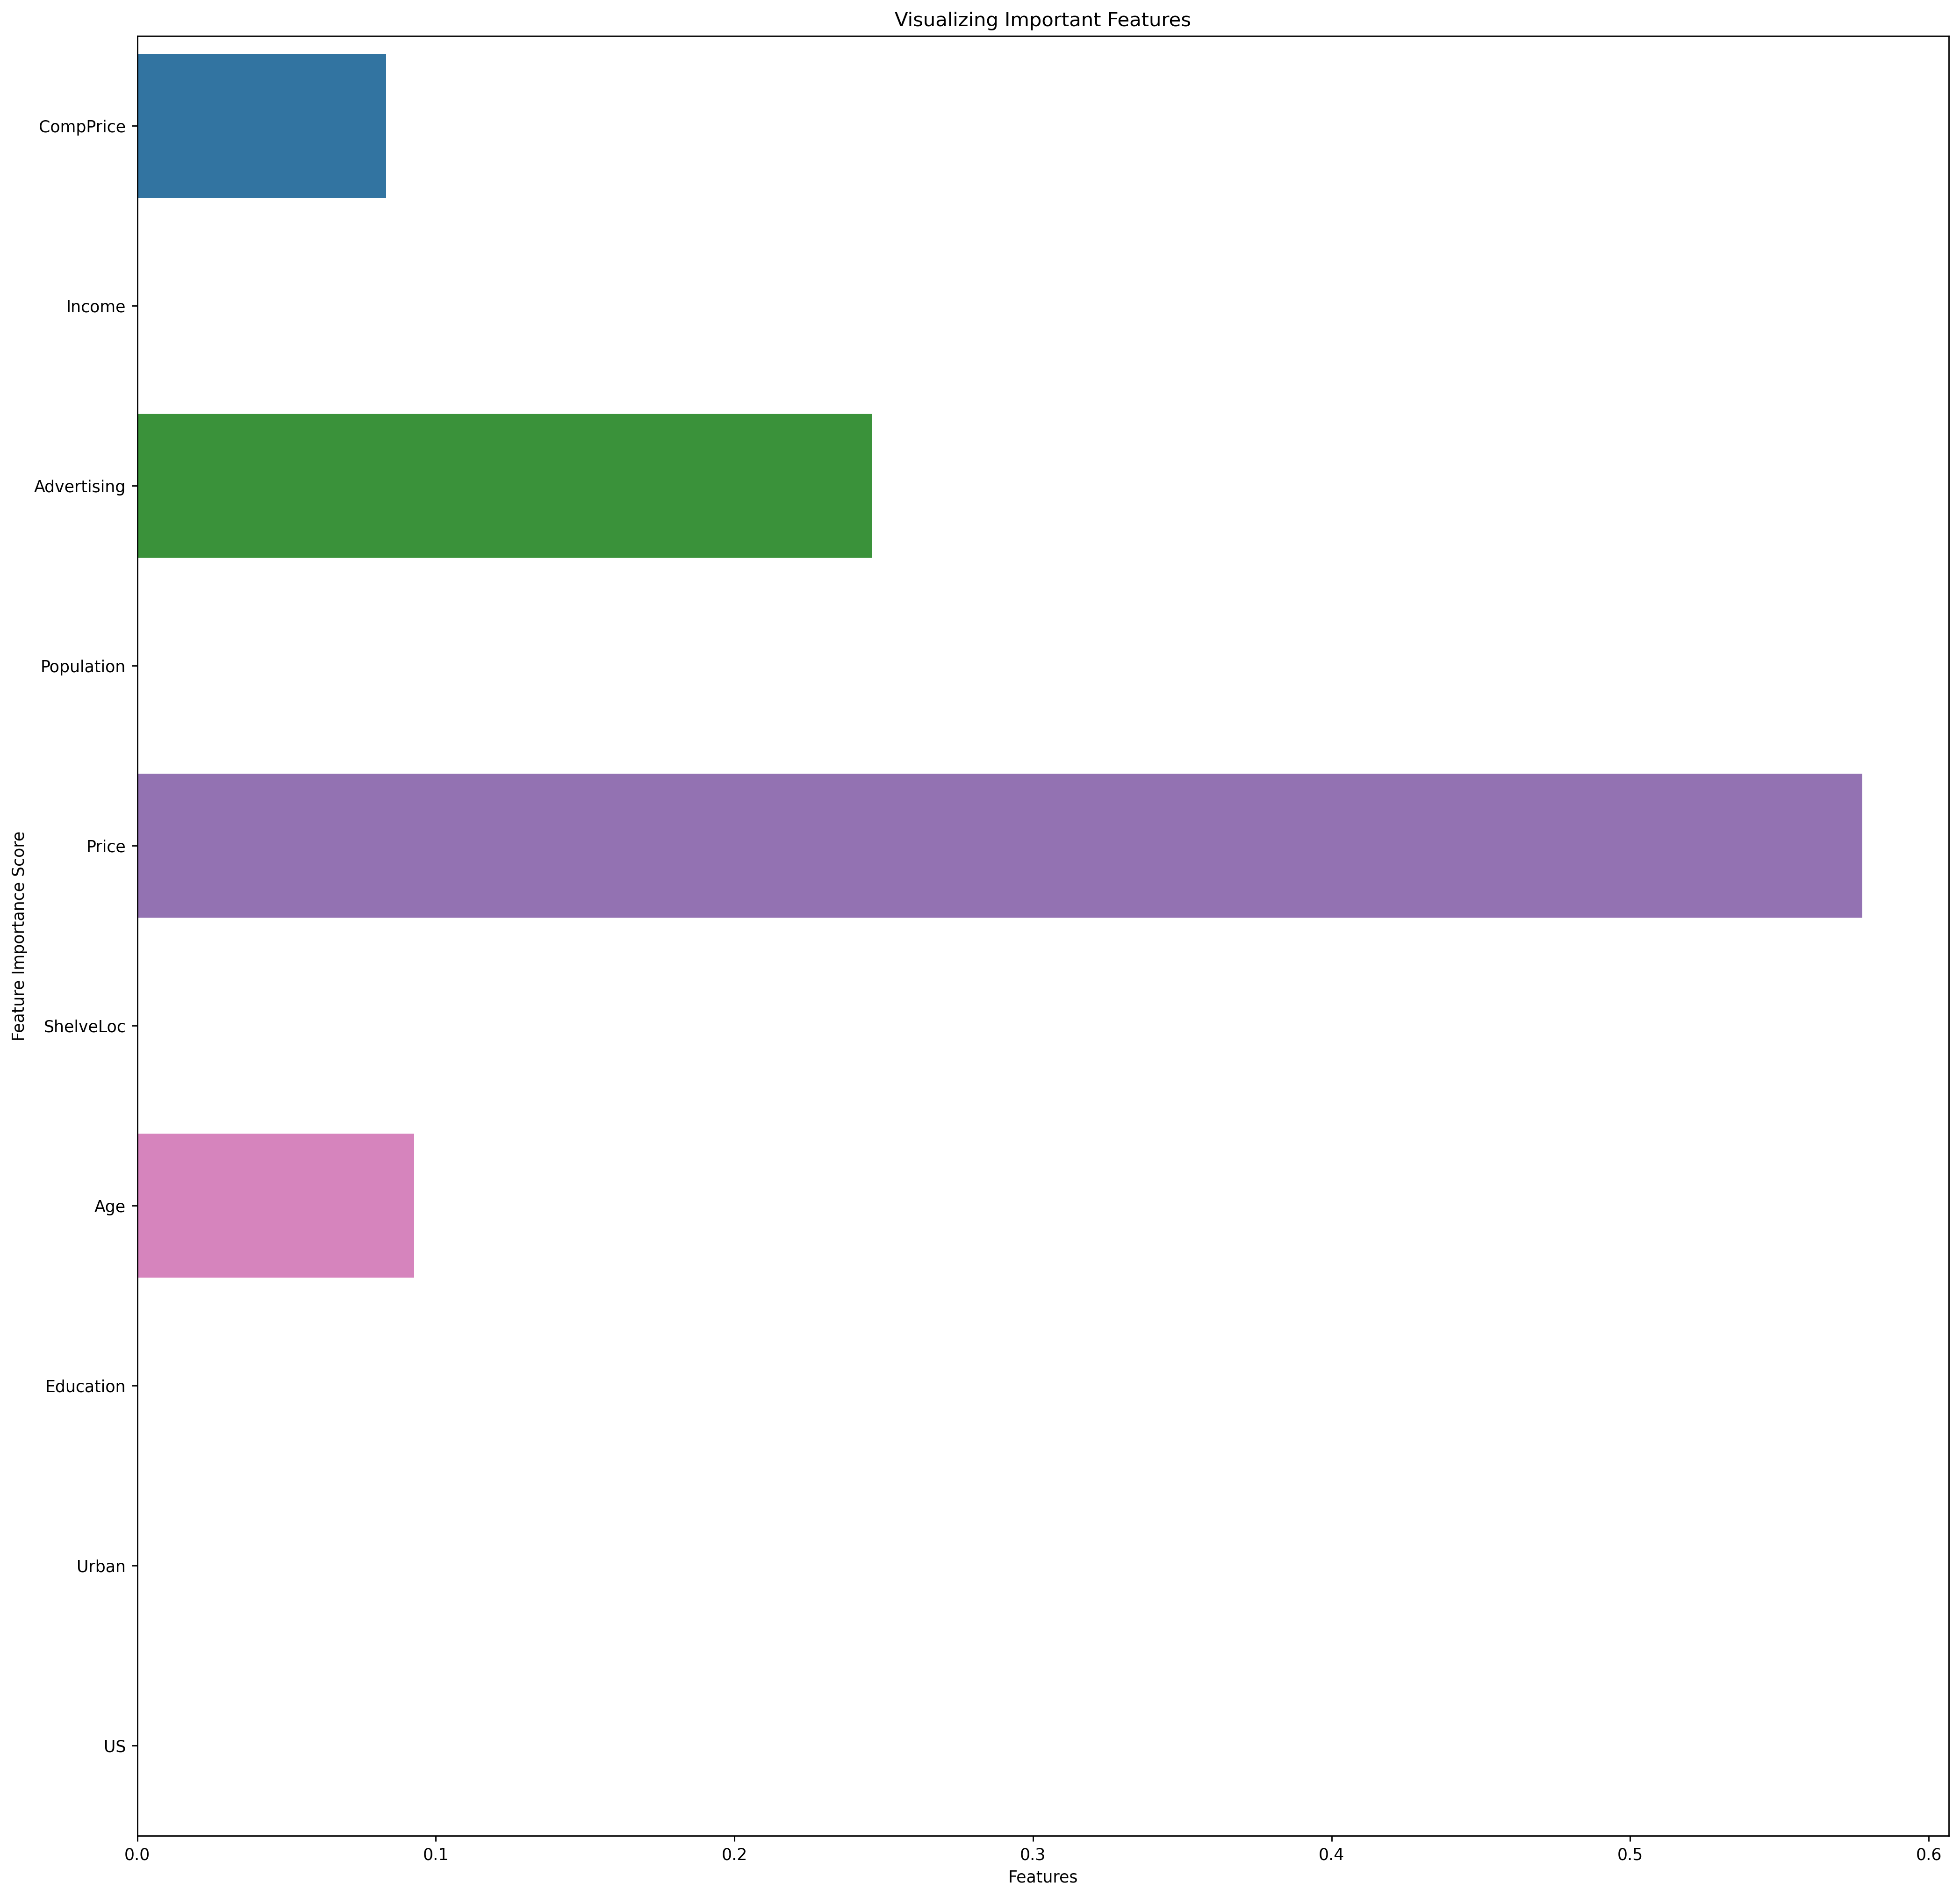

In [27]:
sns.barplot(x = imp2, y=imp2.index)
plt.rcParams['figure.figsize'] = [5,7]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

### Conclusion

Accuracy of Entropy Model = 0.725

'ShelveLoc' is the most important feature according to this model.

Accuracy of Gini(CART) Model = 0.7

'Price' is the most important feature according to this model.

## End